Poniższy notebook prezentuje model ResNet50 i jego wyniki

In [81]:
import torch
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from models.cnn import resnet50
from utils.dataset import create_data_loader, get_transforms
import test
from torchviz import make_dot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [82]:
model = resnet50()
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [83]:
test_loader, class_names = create_data_loader(".\\data\\val", batch_size=1, is_train=False)
print(class_names)

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [74]:
from argparse import Namespace

args = Namespace(
    test_dir=".\\data\\test",
    batch_size=32,
    model_path=".\\best_model.pth"
)
test.main(args)


Validation - Number of batches: 228
Validation: [225/228] 98.7% | Loss: 0.1255 | Acc: 0.9660

Test Loss: 0.1243, Test Accuracy: 0.9662

Detailed classification report:
              precision    recall  f1-score   support

   butterfly       0.96      0.97      0.96       580
         cat       0.98      0.96      0.97       464
     chicken       0.98      0.97      0.98       851
         cow       0.97      0.94      0.96       524
         dog       0.98      0.94      0.96      1370
    elephant       0.95      0.98      0.97       401
       horse       0.92      0.99      0.95       726
       sheep       0.95      0.96      0.96       512
      spider       0.98      0.97      0.98      1342
    squirrel       0.95      0.99      0.97       518

    accuracy                           0.97      7288
   macro avg       0.96      0.97      0.97      7288
weighted avg       0.97      0.97      0.97      7288



In [84]:
image = Image.open(".\\examplepictures\\freddie.jpg").convert('RGB')
transform = get_transforms(train=False)
input_tensor = transform(image).unsqueeze(0)
with torch.no_grad():
    output = model(input_tensor)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    predicted_index = torch.argmax(probabilities).item()

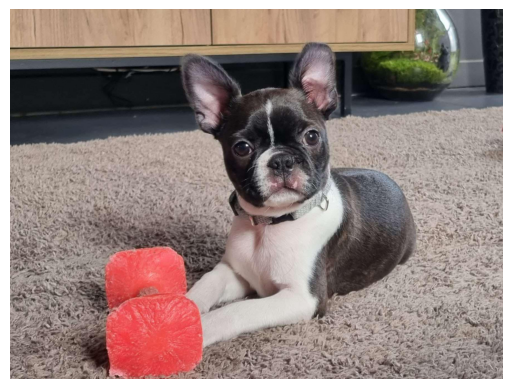

Predykcja: dog (1.00)


In [85]:
plt.imshow(np.array(image))
plt.axis('off')
plt.show()
print(f"Predykcja: {class_names[predicted_index]} ({probabilities[predicted_index]:.2f})")

In [86]:
top5_prob, top5_idx = torch.topk(probabilities, 5)
for i in range(5):
    print(f"{class_names[top5_idx[i]]}: {top5_prob[i]:.4f}")

dog: 1.0000
horse: 0.0000
sheep: 0.0000
chicken: 0.0000
cat: 0.0000


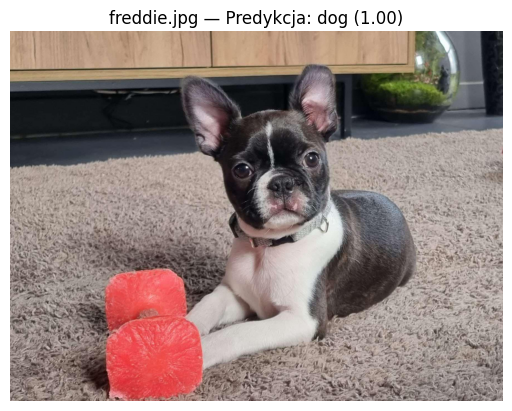

Top 5 predykcji dla freddie.jpg:
dog: 1.0000
horse: 0.0000
sheep: 0.0000
chicken: 0.0000
cat: 0.0000
--------------------------------------------------


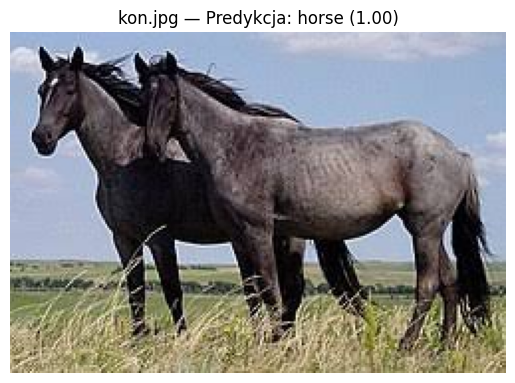

Top 5 predykcji dla kon.jpg:
horse: 1.0000
dog: 0.0000
sheep: 0.0000
cow: 0.0000
chicken: 0.0000
--------------------------------------------------


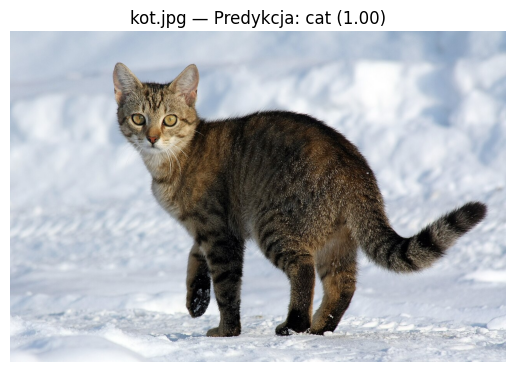

Top 5 predykcji dla kot.jpg:
cat: 1.0000
sheep: 0.0000
cow: 0.0000
dog: 0.0000
horse: 0.0000
--------------------------------------------------


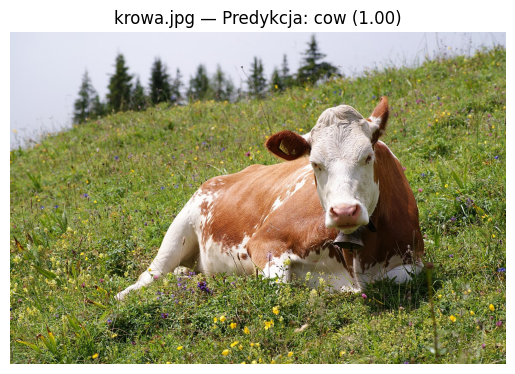

Top 5 predykcji dla krowa.jpg:
cow: 1.0000
sheep: 0.0000
horse: 0.0000
dog: 0.0000
chicken: 0.0000
--------------------------------------------------


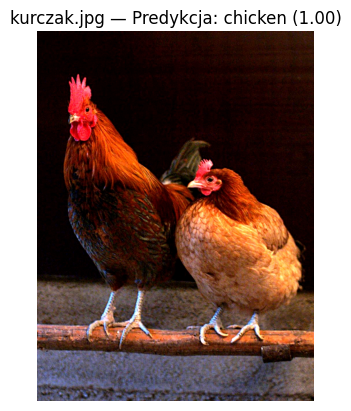

Top 5 predykcji dla kurczak.jpg:
chicken: 1.0000
elephant: 0.0000
cat: 0.0000
horse: 0.0000
dog: 0.0000
--------------------------------------------------


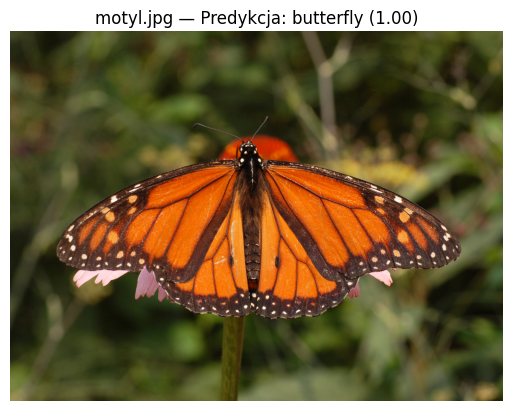

Top 5 predykcji dla motyl.jpg:
butterfly: 1.0000
dog: 0.0000
horse: 0.0000
cat: 0.0000
spider: 0.0000
--------------------------------------------------


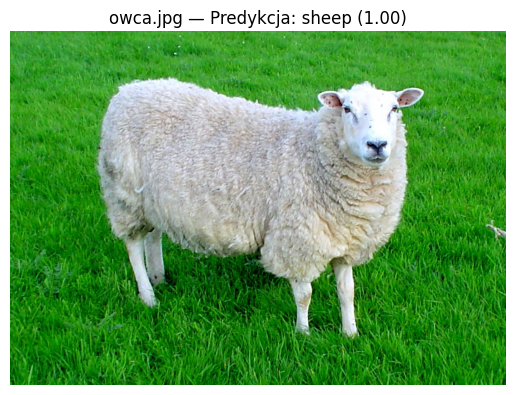

Top 5 predykcji dla owca.jpg:
sheep: 1.0000
horse: 0.0000
cow: 0.0000
dog: 0.0000
cat: 0.0000
--------------------------------------------------


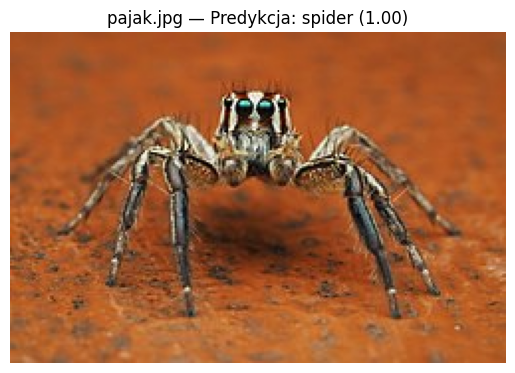

Top 5 predykcji dla pajak.jpg:
spider: 0.9988
horse: 0.0007
cow: 0.0004
elephant: 0.0000
dog: 0.0000
--------------------------------------------------


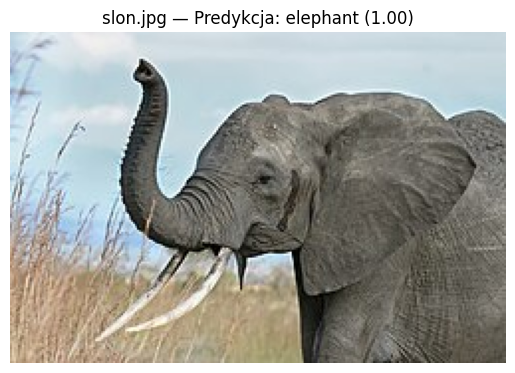

Top 5 predykcji dla slon.jpg:
elephant: 1.0000
horse: 0.0000
dog: 0.0000
butterfly: 0.0000
chicken: 0.0000
--------------------------------------------------


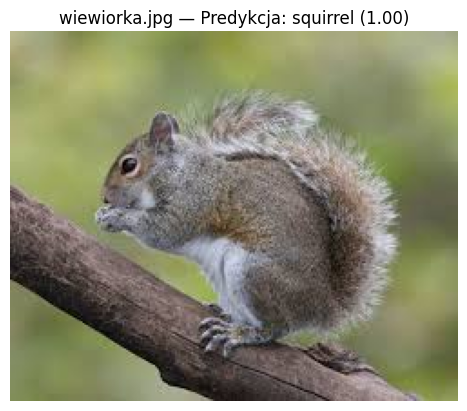

Top 5 predykcji dla wiewiorka.jpg:
squirrel: 1.0000
dog: 0.0000
horse: 0.0000
elephant: 0.0000
cat: 0.0000
--------------------------------------------------


In [88]:
folder_path = "./examplepictures"

image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

for filename in image_files:
    image_path = os.path.join(folder_path, filename)
    image = Image.open(image_path).convert('RGB')

    transform = get_transforms(train=False)
    input_tensor = transform(image).unsqueeze(0)

    with torch.no_grad():
        input_tensor = input_tensor.to(model.device if hasattr(model, 'device') else 'cpu')  # jeśli model ma device
        output = model(input_tensor)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        predicted_index = torch.argmax(probabilities).item()

    plt.imshow(np.array(image))
    plt.axis('off')
    plt.title(f"{filename} — Predykcja: {class_names[predicted_index]} ({probabilities[predicted_index]:.2f})")
    plt.show()

    print(f"Top 5 predykcji dla {filename}:")
    top5_prob, top5_idx = torch.topk(probabilities, 5)
    for i in range(5):
        print(f"{class_names[top5_idx[i]]}: {top5_prob[i]:.4f}")
    print("-" * 50)

In [57]:
x = torch.randn(1, 3, 224, 224)
y = model(x)
make_dot(y, params=dict(model.named_parameters())).render("model", format="png")

'model.png'

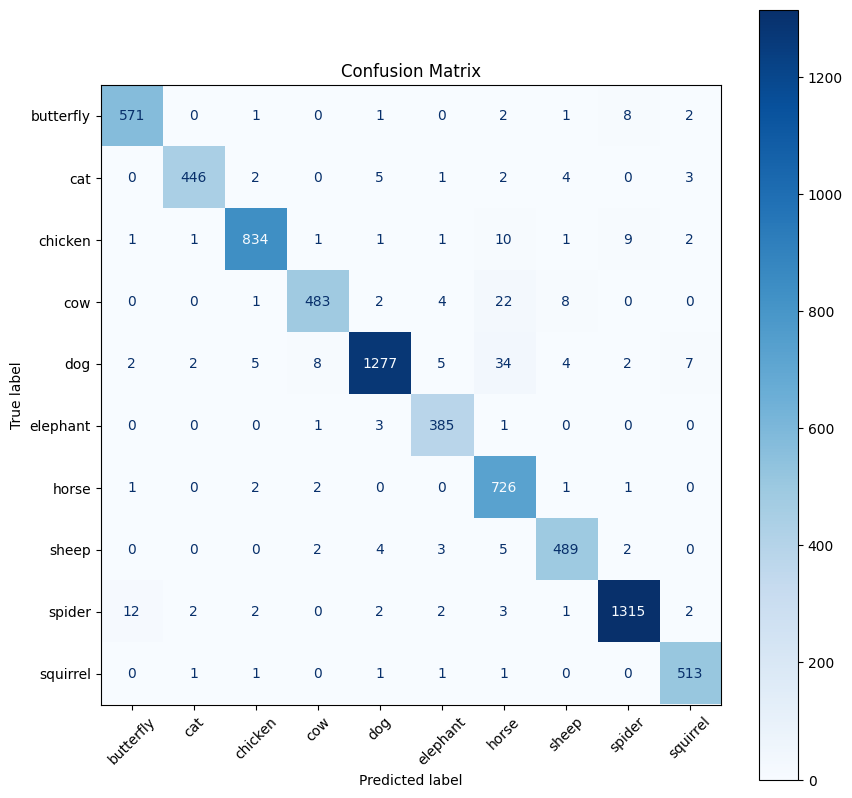

In [89]:
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()